<a href="https://colab.research.google.com/github/anisafitriani1122/Tugas-Akhir/blob/main/Code_TA_Anisa_Fitriani_Data_Taksiran_Muka_Air_Laut_Maksimum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam

In [ ]:
# Import Dataset
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTacoDEDwQG-V8RUcgo3PEiFqrBBAFePbGjxNoXMrNh8ozninhqJh30Et2mmBc-5mEa9aGD2qaq_-7X/pub?output=xlsx'

# Membaca file Excel dari URL dan memuatnya sebagai DataFrame Pandas
data = pd.read_excel(link)

# Mengambil kolom 'Sea Level' dari DataFrame
sea_level_data = data['Sea Level Error Upper']

# Menampilkan 5 baris pertama dari kolom 'Sea Level'
print("5 Baris Pertama dari Kolom 'Sea Level Error Upper':")
print(sea_level_data.head())

# Menampilkan statistik deskriptif dari kolom 'Sea Level'
print("\nStatistik Deskriptif 'Sea Level':")
print(sea_level_data.describe())

# Mengambil kolom 'Sea Level' dari DataFrame dan mengubahnya menjadi array NumPy
dataset = data['Sea Level Error Upper'].values

# Mengonversi array NumPy ke tipe data float32
dataset = dataset.astype('float32')

5 Baris Pertama dari Kolom 'Sea Level Error Upper':
0   -75.73
1   -74.96
2   -74.88
3   -73.30
4   -72.14
Name: Sea Level Error Upper, dtype: float64

Statistik Deskriptif 'Sea Level':
count    799.000000
mean     -30.976283
std       32.779242
min     -113.970000
25%      -57.280000
50%      -28.410000
75%       -5.360000
max       47.050000
Name: Sea Level Error Upper, dtype: float64


In [ ]:
# Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))  # Menentukan rentang nilai output normalisasi (0 hingga 1)
dataset = np.reshape(dataset, (-1, 1))  # Mengubah array dataset menjadi array 2 dimensi dengan satu kolom
dataset = scaler.fit_transform(dataset)  # Normalisasi data agar nilainya berada dalam rentang 0 hingga 1

# Menampilkan dataset yang telah dinormalisasi
print(dataset)

[[0.237486  ]
 [0.24226806]
 [0.24276489]
 [0.2525773 ]
 [0.2597814 ]
 [0.2645013 ]
 [0.27611476]
 [0.30462056]
 [0.35678798]
 [0.42926344]
 [0.49906844]
 [0.5611725 ]
 [0.61035895]
 [0.6429636 ]
 [0.6730841 ]
 [0.6894175 ]
 [0.7078624 ]
 [0.71047074]
 [0.7149422 ]
 [0.71997267]
 [0.7275494 ]
 [0.73369765]
 [0.7399081 ]
 [0.74090177]
 [0.74363434]
 [0.743448  ]
 [0.7376723 ]
 [0.71059495]
 [0.67252517]
 [0.6431499 ]
 [0.61961246]
 [0.5992423 ]
 [0.59048563]
 [0.57427645]
 [0.5735933 ]
 [0.5671966 ]
 [0.5421687 ]
 [0.51316607]
 [0.46994162]
 [0.45522296]
 [0.4453484 ]
 [0.43895167]
 [0.43876538]
 [0.44323686]
 [0.42659298]
 [0.40485653]
 [0.39926717]
 [0.39523038]
 [0.3935536 ]
 [0.38597688]
 [0.37895912]
 [0.38069806]
 [0.38187802]
 [0.3844243 ]
 [0.39206308]
 [0.3982735 ]
 [0.41261956]
 [0.4363433 ]
 [0.4532356 ]
 [0.46932057]
 [0.48683393]
 [0.50130415]
 [0.5203701 ]
 [0.5453981 ]
 [0.5624146 ]
 [0.578748  ]
 [0.5852689 ]
 [0.59520555]
 [0.60265803]
 [0.57843745]
 [0.5434108 ]
 [0.50

In [ ]:
# Bagi Data Menjadi Training dan Testing
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

639 160


In [ ]:
# Fungsi untuk Membuat Dataset untuk LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 6  # Jumlah langkah waktu yang digunakan untuk prediksi
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# Reshape input untuk LSTM (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# Hyperparameter yang akan dituning selain look_back
epochs = 100          #[50, 100]
batch_size = 16       #[16, 32]
learning_rate = 0.01  #[0.001, 0.01]
units = 128            #[64, 128]

# Model LSTM
model = Sequential()
model.add(LSTM(units=units, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=units))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile Model dengan Adam Optimizer dan Learning Rate yang bisa diubah
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

#Train Model dengan Epoch dan Batch Size yang bisa diubah
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

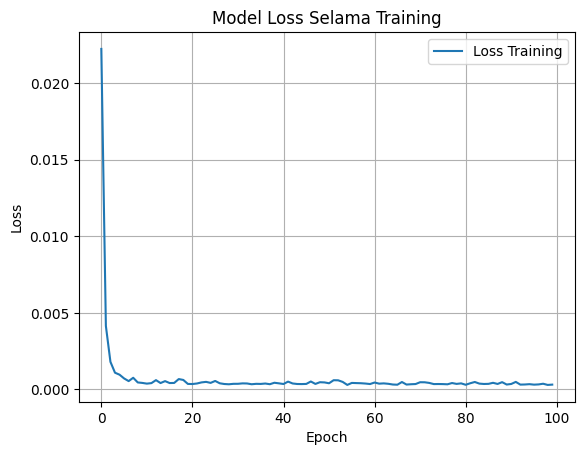

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Loss Training')  # Mengambil nilai loss dari history
plt.title('Model Loss Selama Training')  # Judul grafik
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Loss')  # Label sumbu Y
plt.legend()  # Menambahkan legenda untuk membedakan grafik loss training
plt.grid()  # Menambahkan grid untuk memperjelas grafik
plt.show()  # Menampilkan grafik

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


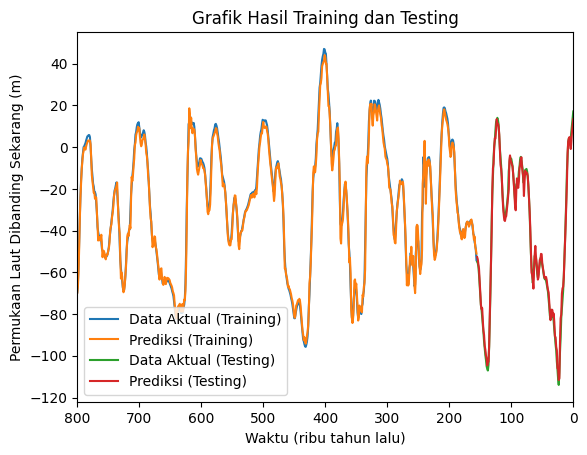

In [ ]:
# Prediksi
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse Transform untuk mendapatkan nilai asli
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Flatten the arrays to 1-D
trainPredict = trainPredict.flatten()  # Mengubah array hasil prediksi pada data training menjadi array 1-D
testPredict = testPredict.flatten()    # Mengubah array hasil prediksi pada data testing menjadi array 1-D
trainY = trainY.flatten()              # Mengubah array label asli (ground truth) dari data training menjadi array 1-D
testY = testY.flatten()                # Mengubah array label asli (ground truth) dari data testing menjadi array 1-D

# Membuat array waktu dari 800 ke 0
total_length = len(trainY) + len(testY)  # Total panjang data
waktu = np.linspace(800, 0, num=total_length)  # Waktu dari 800 ke 0

# Plot prediksi vs nilai aktual
plt.plot(waktu[:len(trainY)], trainY, label='Data Aktual (Training)')  # Data aktual training
plt.plot(waktu[:len(trainY)], trainPredict, label='Prediksi (Training)')  # Prediksi training
plt.plot(waktu[len(trainY):], testY, label='Data Aktual (Testing)')  # Data aktual testing
plt.plot(waktu[len(trainY):], testPredict, label='Prediksi (Testing)')  # Prediksi testing

# Menambahkan judul dan label
plt.title('Grafik Hasil Training dan Testing')  # Judul grafik
plt.xlabel('Waktu (ribu tahun lalu)')  # Label sumbu X
plt.ylabel('Permukaan Laut Dibanding Sekarang (m)')  # Label sumbu Y

plt.legend()  # Menampilkan legenda
plt.xlim(800, 0)  # Mengatur batas sumbu X dari 800 ke 0
plt.show()  # Menampilkan plot

In [ ]:
# Menghitung RMSE untuk data training
train_rmse = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE:', train_rmse)

# Calculate RMSE for testing data
test_rmse = math.sqrt(mean_squared_error(testY, testPredict))
print('Test RMSE:', test_rmse)

Train RMSE: 2.86467585483841
Test RMSE: 2.771720608110556


In [ ]:
# Menghitung R-squared untuk data training
train_r2 = r2_score(trainY, trainPredict)
print('Train R-squared:', train_r2)

# Menghitung R-squared untuk data testing
test_r2 = r2_score(testY, testPredict)
print('Test R-squared:', test_r2)

Train R-squared: 0.9914950368651942
Test R-squared: 0.9940297844213695


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

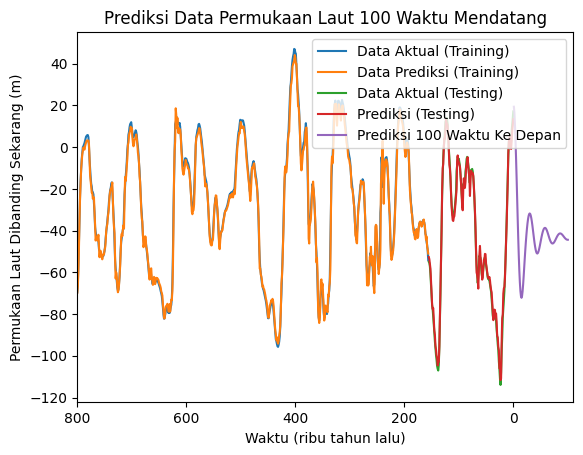

Forecast untuk 24 waktu ke depan: [ 19.347355   16.400738   10.570798    3.4203136  -5.171644  -14.509695
 -24.352818  -34.15752   -43.498066  -51.91774   -59.09071   -64.802284
 -68.93917   -71.42531   -72.224144  -71.39615   -69.15053   -65.82909
 -61.835117  -57.54906   -53.26988   -49.195724  -45.437782  -42.0526
 -39.076817  -36.54989   -34.518925  -33.030144  -32.11647   -31.788568
 -32.03153   -32.805573  -34.04879   -35.680454  -37.604763  -39.714996
 -41.89837   -44.04133   -46.0353    -47.78238   -49.20098   -50.230835
 -50.83693   -51.01167   -50.77466   -50.169727  -49.259586  -48.118885
 -46.827156  -45.462654  -44.097942  -42.797253  -41.615303  -40.596786
 -39.776237  -39.177723  -38.81468   -38.689747  -38.795013  -39.11256
 -39.615517  -40.269474  -41.03431   -41.866215  -42.719944  -43.551132
 -44.31853   -44.986145  -45.52501   -45.91458   -46.14355   -46.21003
 -46.12111   -45.89183   -45.543686  -45.102802  -44.59808   -44.05931
 -43.515625  -42.994053  -42.5185   

In [ ]:
look_back = 6  # Jumlah langkah waktu yang digunakan untuk prediksi
last_data = dataset[-look_back:]  # Ambil data terakhir sebanyak look_back
forecast_data = []

# Forecast untuk 10 waktu ke depan
for _ in range(100):  # Forecast untuk 10 langkah waktu
    input_data = np.reshape(last_data, (1, look_back, 1))
    prediction = model.predict(input_data)
    forecast_data.append(prediction[0][0])
    last_data = np.append(last_data[1:], prediction)  # Update data terakhir dengan prediksi
    last_data = last_data[-look_back:]

# Inverse transform untuk mendapatkan nilai asli
forecast_data = scaler.inverse_transform(np.array(forecast_data).reshape(-1, 1))
forecast_data = forecast_data.flatten()

# Membuat array waktu untuk 10 waktu ke depan dari -1 hingga -25
waktu_prediksi = np.arange(-1, -101, -1)  # Waktu dari -1 ke -10

# Membuat array waktu untuk data aktual dari 800 hingga 0
total_length = len(trainY) + len(testY)  # Total panjang data
waktu_aktual = np.linspace(800, 0, num=total_length)  # Waktu dari 800 ke 0

# Membuat DataFrame untuk hasil prediksi
data_prediksi = pd.DataFrame({
    'Waktu (ribu tahun lalu)': waktu_prediksi,
    'Permukaan Laut (m)': forecast_data
})

# Menampilkan tabel hasil prediksi
print(data_prediksi)

# Plot forecast
plt.plot(waktu_aktual[:len(trainY)], trainY, label='Data Aktual (Training)')  # Data aktual training
plt.plot(waktu_aktual[:len(trainY)], trainPredict, label='Data Prediksi (Training)')  # Prediksi training
plt.plot(waktu_aktual[len(trainY):], testY, label='Data Aktual (Testing)')  # Data aktual testing
plt.plot(waktu_aktual[len(trainY):], testPredict, label='Prediksi (Testing)')  # Prediksi testing
plt.plot(waktu_prediksi, forecast_data, label='Prediksi 100 Waktu Ke Depan', linestyle='-')  # Prediksi 10 waktu ke depan

# Menambahkan judul dan label
plt.title('Prediksi Data Permukaan Laut 100 Waktu Mendatang')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding Sekarang (m)')

plt.legend()  # Menampilkan legenda
plt.xlim(800, -110)  # Mengatur batas sumbu X dari 800 ke -20
plt.show()  # Menampilkan plot

print("Forecast untuk 24 waktu ke depan:", forecast_data)

In [ ]:
# Hasil Prediksi 1 Waktu Ke depan
# waktu_prediksi = np.arange(0, 2, 1)
# forecast_data = [20.38, 19.347355]  # Example forecast values


# plt.plot(waktu_prediksi, forecast_data, label='Prediksi 1 Waktu Ke Depan', marker='o')

# Menambahkan judul dan label
# plt.title('Prediksi Data Permukaan Laut 1 Waktu Mendatang')
# plt.xlabel('Waktu (ribu tahun lalu)')
# plt.ylabel('Permukaan Laut Dibanding Sekarang (m)')

# Mengatur rentang sumbu Y dengan interval 0.05
# y_ticks = np.arange(min(forecast_data) - 0.05, max(forecast_data) + 0.05, 0.05)
# plt.yticks(y_ticks)
# Mengatur rentang sumbu X dengan interval 0.1
# x_ticks = np.arange(0, 1.1, 0.1)  # Rentang dari 0 hingga 2 dengan interval 0.1
# plt.xticks(x_ticks)

# plt.legend()  # Menampilkan legenda
# plt.grid(True) #adds gridlines
# plt.show()  # Menampilkan plot

In [ ]:
#from itertools import product

# Parameter untuk Grid Search
# look_back_list = [3, 6, 12]  # Variasi look_back yang ingin diuji
# epochs_list = [50, 100]
# batch_size_list = [16, 32]
# learning_rate_list = [0.001, 0.01]
# units_list = [64, 128]

# Menyimpan hasil tuning
# results = []

# Iterasi semua kombinasi hyperparameter
# for look_back, epochs, batch_size, learning_rate, units in product(look_back_list, epochs_list, batch_size_list, learning_rate_list, units_list):
    # print(f"Training with: look_back={look_back}, epochs={epochs}, batch_size={batch_size}, learning_rate={learning_rate}, units={units}")

    # Membentuk dataset berdasarkan look_back
    # trainX, trainY = create_dataset(train, look_back)
    # testX, testY = create_dataset(test, look_back)

    # Reshape input untuk LSTM (samples, timesteps, features)
    # trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    # testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Buat model
    # model = Sequential()
    # model.add(LSTM(units=units, return_sequences=True, input_shape=(look_back, 1)))
    # model.add(LSTM(units=units))
    # model.add(Dense(1))

    # Compile model
    # optimizer = Adam(learning_rate=learning_rate)
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Train model
    # history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

    # Prediksi
    # testPredict = model.predict(testX)
    # testPredict = scaler.inverse_transform(testPredict)
    # testY_actual = scaler.inverse_transform([testY])

    # Menghitung RMSE
    # test_rmse = math.sqrt(mean_squared_error(testY_actual.flatten(), testPredict.flatten()))
    # print(f"Test RMSE: {test_rmse}")

    # Simpan hasil
    # results.append({
        # 'look_back': look_back,
        # 'epochs': epochs,
        # 'batch_size': batch_size,
        # 'learning_rate': learning_rate,
        # 'units': units,
        # 'test_rmse': test_rmse
    # })

# Cari kombinasi terbaik
# best_result = min(results, key=lambda x: x['test_rmse'])
# print("Best Hyperparameters:")
# print(best_result)


Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Test RMSE: 4.446637408671594
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 4.316709156284108
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.01, units=64


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE: 2.42657455253735
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Test RMSE: 2.7827928725191375
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 9.268813643577126
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 6.702416311145712
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE: 2.766920364801396
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 3.335984204096215
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 3.213427084139861
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Test RMSE: 3.2337122433373704
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Test RMSE: 2.760085735320323
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Test RMSE: 3.479807080186607
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE: 4.301088081723022
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Test RMSE: 3.7442547848936636
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Test RMSE: 2.4778525414291854
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE: 2.626318428739193
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Test RMSE: 4.381863144431049
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Test RMSE: 3.136304594824817
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE: 3.3206489326231425
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Test RMSE: 2.860553444403078
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Test RMSE: 7.345190236600576
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Test RMSE: 6.335206060959508
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Test RMSE: 2.554668476319156
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Test RMSE: 2.807905522646325
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Test RMSE: 2.7865581926348866
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 2.7534596149390187
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Test RMSE: 2.917501935073491
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Test RMSE: 2.4264342108402537
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Test RMSE: 3.714806487869274
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 3.32378497306969
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Test RMSE: 2.7424898882774853
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 3.255447265343867
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Test RMSE: 4.411346048095391
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Test RMSE: 3.3910191438275095
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Test RMSE: 2.696765021509037
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
Test RMSE: 2.8607975096163463
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 5.672873968262737
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
Test RMSE: 4.1685027006959725
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Test RMSE: 3.049681269755631
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Test RMSE: 2.642236029095383
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Test RMSE: 3.9389306169117844
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 2.7220957518258277
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Test RMSE: 2.5408461408590464
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 2.4409614517722797
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 3.046629793468051
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Test RMSE: 3.053567141561501
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Test RMSE: 2.642602979538125
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Test RMSE: 2.534954294648524
Best Hyperparameters:
{'look_back': 6, 'epochs': 100, 'batch_size': 16, 'learning_rate': 0.01, 'units': 128, 'test_rmse': 2.4264342108402537}
